# Machine Learning For Image Recognition RPS (Rock, Paper, Scissors)
## With CNN Architecture (Computer Vision)
Name     : Muhammad Anandha Fritama
Email    : anandha.fritama@gmail.com

## Workflow For Creating Machine Learning


1.   TensorFlow Version Check
2.   Download & Unzip Datasets
3.   Set-Up Directory
4.   Pre-Processing (Image Augmentation)
5.   Pre-Training & Validation
6.   Creating Machine learning Architecture (CNN)
7.   Compile & Training
8.   Prediction
9.   Final & Re-Test



### 1. TensorFlow Version Check

In [ ]:
import tensorflow as tflow
print(tflow.__version__)

2.8.2


### 2. Download & Un-ZIP datasets

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~./kaggle/kaggle.json

chmod: cannot access '~./kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

 94% 289M/306M [00:02<00:00, 106MB/s] 
100% 306M/306M [00:02<00:00, 115MB/s]


In [ ]:
import zipfile,os,shutil
file_zip = '/content/rockpaperscissors.zip'
file_ekstrak = zipfile.ZipFile(file_zip, 'r')
file_ekstrak.extractall('/content/data')
file_ekstrak.close()

os.mkdir(os.path.join("/content/data/latih"))
shutil.move("/content/data/paper", "/content/data/latih")
shutil.move("/content/data/rock", "/content/data/latih")
shutil.move("/content/data/scissors", "/content/data/latih")
file_latih = os.path.join("/content/data/latih")
file_validasi = os.path.join("/content/data", 'rps-cv-images')

### 3. Set-Up Directory

In [ ]:
os.listdir(file_latih)

['scissors', 'rock', 'paper']

In [ ]:
os.listdir(file_validasi)

['scissors', 'rock', 'paper', 'README_rpc-cv-images.txt']

### 4. Pre-Processing (Image Augmentation)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
data_train = ImageDataGenerator(rescale=1./255,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    validation_split=0.4,
                    fill_mode = "reflect")
 
data_validation = ImageDataGenerator(rescale=1./255,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    validation_split=0.4,
                    fill_mode = "reflect")

### 5. Pre-Training & Validation

In [ ]:
train_generator = data_train.flow_from_directory(
    file_latih,
    target_size=(150, 150),
    batch_size=8,
    shuffle=True,
    interpolation='nearest',
    class_mode='categorical',
    subset='training')

validation_generator = data_validation.flow_from_directory(
    file_validasi,
    target_size=(150, 150),
    batch_size=8,
    shuffle=True,
    interpolation='nearest',
    class_mode='categorical',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


### 6. Creating Machine learning Architecture (CNN)

In [ ]:
model = tflow.keras.models.Sequential([
    tflow.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tflow.keras.layers.MaxPooling2D(2, 2),
    tflow.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tflow.keras.layers.MaxPooling2D(2,2),
    tflow.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tflow.keras.layers.MaxPooling2D(2,2),
    tflow.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tflow.keras.layers.MaxPooling2D(2,2),
    tflow.keras.layers.Flatten(),
    tflow.keras.layers.Dropout(0.4),
    tflow.keras.layers.Dense(512, activation='relu'),
    tflow.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

### 7. Compile & Training

In [ ]:
model.compile(loss=tflow.keras.losses.CategoricalCrossentropy(),
              optimizer=tflow.optimizers.SGD(nesterov=True),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator, 
      epochs=40,
      steps_per_epoch=32, 
      validation_data=validation_generator,
      validation_steps=32,
      shuffle=True,
      verbose=2)

Epoch 1/40
32/32 - 4s - loss: 0.3663 - accuracy: 0.8789 - val_loss: 0.2949 - val_accuracy: 0.9023 - 4s/epoch - 139ms/step
Epoch 2/40
32/32 - 3s - loss: 0.3393 - accuracy: 0.8711 - val_loss: 0.2441 - val_accuracy: 0.9336 - 3s/epoch - 109ms/step
Epoch 3/40
32/32 - 4s - loss: 0.3111 - accuracy: 0.8867 - val_loss: 0.2696 - val_accuracy: 0.9062 - 4s/epoch - 110ms/step
Epoch 4/40
32/32 - 3s - loss: 0.3407 - accuracy: 0.8640 - val_loss: 0.2969 - val_accuracy: 0.9102 - 3s/epoch - 108ms/step
Epoch 5/40
32/32 - 4s - loss: 0.2611 - accuracy: 0.9102 - val_loss: 0.3731 - val_accuracy: 0.8945 - 4s/epoch - 110ms/step
Epoch 6/40
32/32 - 3s - loss: 0.3103 - accuracy: 0.8867 - val_loss: 0.2255 - val_accuracy: 0.9297 - 3s/epoch - 109ms/step
Epoch 7/40
32/32 - 3s - loss: 0.2568 - accuracy: 0.9023 - val_loss: 0.3447 - val_accuracy: 0.8711 - 3s/epoch - 108ms/step
Epoch 8/40
32/32 - 3s - loss: 0.2809 - accuracy: 0.9062 - val_loss: 0.2511 - val_accuracy: 0.9102 - 3s/epoch - 109ms/step
Epoch 9/40
32/32 - 3s - 

### 8. Prediksi

Saving testpaper01-00.png to testpaper01-00.png
testpaper01-00.png
Kertas


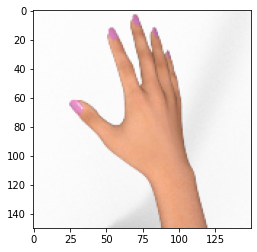

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
testing = files.upload()
 
for images in testing.keys():
 
  path = images
  picture = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(picture)
  x = image.img_to_array(picture)
  x = np.expand_dims(x, axis=0)
 
  pictures = np.vstack([x])
  class_rps = model.predict(pictures, batch_size=16)
  output = np.argmax(class_rps)
  
  print(images)
  if output==0:
    print('Paper')
  elif output==1:
    print('Rock')
  elif output==2:
    print('Scissor')
  else:
    print('Not a Hand :)')